
## 1 Machine Learning Workflow

1. Define Problem
1. Specify Inputs & Outputs
1. Exploratory Data Analysis
1. Data Collection
1. Data Preprocessing
1. Data Cleaning
1. Visualization
1. Model Design, Training, and Offline Evaluation
1. Model Deployment, Online Evaluation, and Monitoring
1. Model Maintenance, Diagnosis, and Retraining


## Các đặc trưng của tập dữ liệu
Tàu Titanic bị đắm vào **15 tháng 4 năm 1912**, làm chết **1502 / 2224** hành khách và thủy thủ

Trong tập dữ liệu về tàu Titanic này, chúng ta sẽ có **12 đặc trưng như sau**:
1. PassengerId
1. Survival
1. Pclass
1. Name
1. Sex
1. Age
1. SibSp
1. Parch
1. Ticket
1. Fare
1. Cabin
1. Embarked

Chi tiết: https://www.kaggle.com/c/titanic/data


In [1]:
import json
import sys
import csv
import os

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

import pandas as pd
from pandas import get_dummies

import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import xgboost as xgb

import seaborn as sns

import scipy
import numpy as np

In [2]:
sns.set(style='white', context='notebook', palette='deep')
pylab.rcParams['figure.figsize'] = 12,8
mpl.style.use('ggplot')
sns.set_style('white')
%matplotlib inline

## Exploratory Data Analysis(EDA)
*   Data Collection
*   Visualization
*   Data Preprocessing
*   Data Cleaning

<img src="http://s9.picofile.com/file/8338476134/EDA.png">

## Data Collection
Đây là quá trình thu thập bất kì dữ liệu nào đáng chú ý, có tiềm năng giải đáp vấn đầ của chúng ta.

In [3]:
# import train and test to play with it
df_train = pd.read_csv('raw/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


><font color="red"><b>Note: </b></font>

* Cách gọi khác của 1 dòng **dòng**: observation, sample, example, instance, record
* Cách gọi khác của 1 **cột**: feature, attribute


## Visualization
Đây là bước biểu thị dữ liệu dưới dạng hình ảnh, đồ thị.

### Scatter Plot

[Scatter plot](https://en.wikipedia.org/wiki/Scatter_plot) Xác định quan hệ giữa 2 đặc trưng.



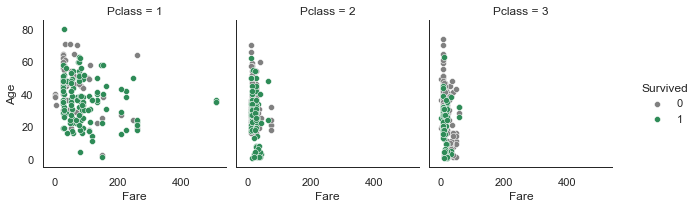

In [4]:
# Modify the graph above by assigning each species an individual color.
g = sns.FacetGrid(df_train, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"}) #https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();


### Box
Box là phương pháp mô ta dữ liệu số thông qua những phần tư của chúng.
Chi tiết: 
- https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review
- https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule
<img src="https://miro.medium.com/max/13500/1*2c21SkzJMf3frPXPAR_gZA.png">


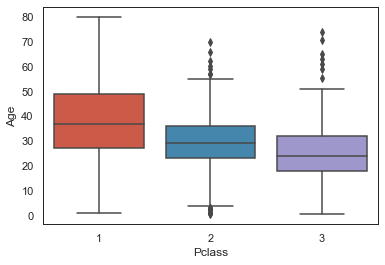

In [5]:
ax= sns.boxplot(x="Pclass", y="Age", data=df_train)
plt.show()


### Histogram

<Figure size 432x288 with 0 Axes>

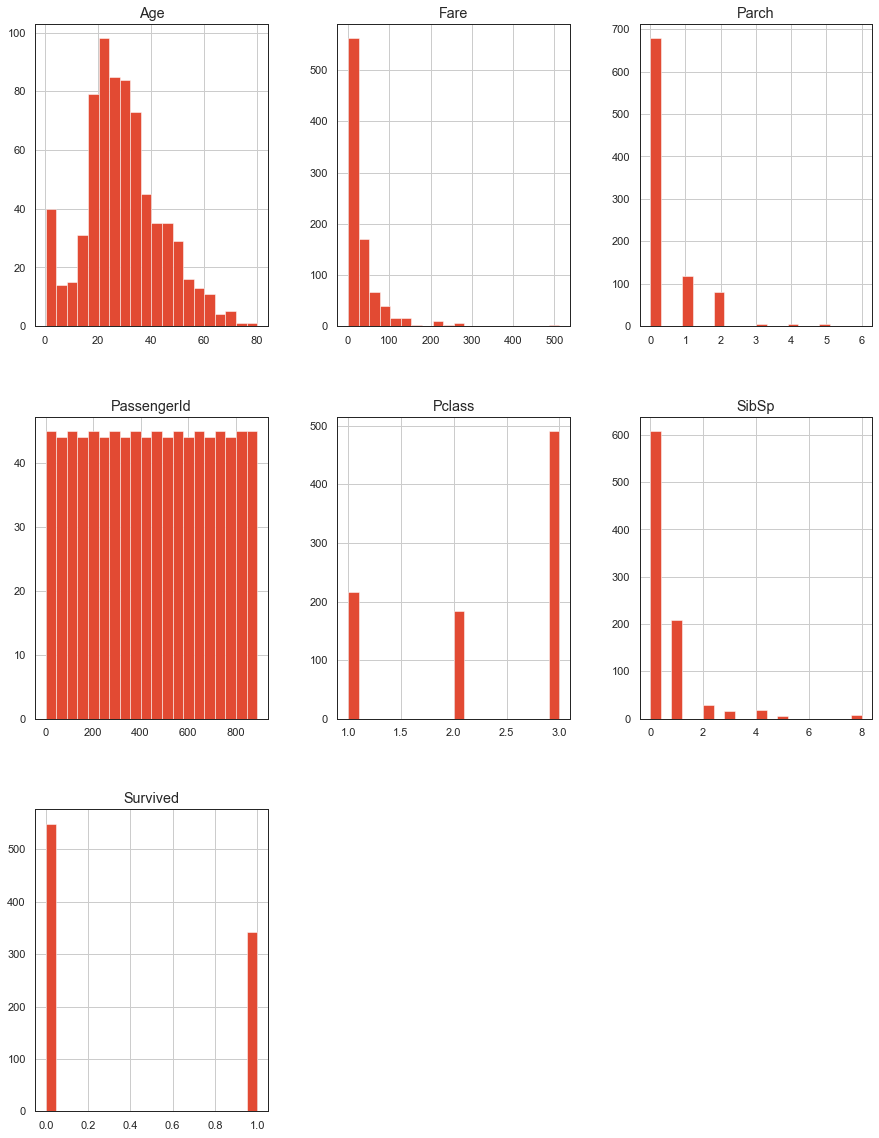

<Figure size 432x288 with 0 Axes>

In [6]:
# histograms
df_train.hist(figsize=(15,20),bins=20)
plt.figure()

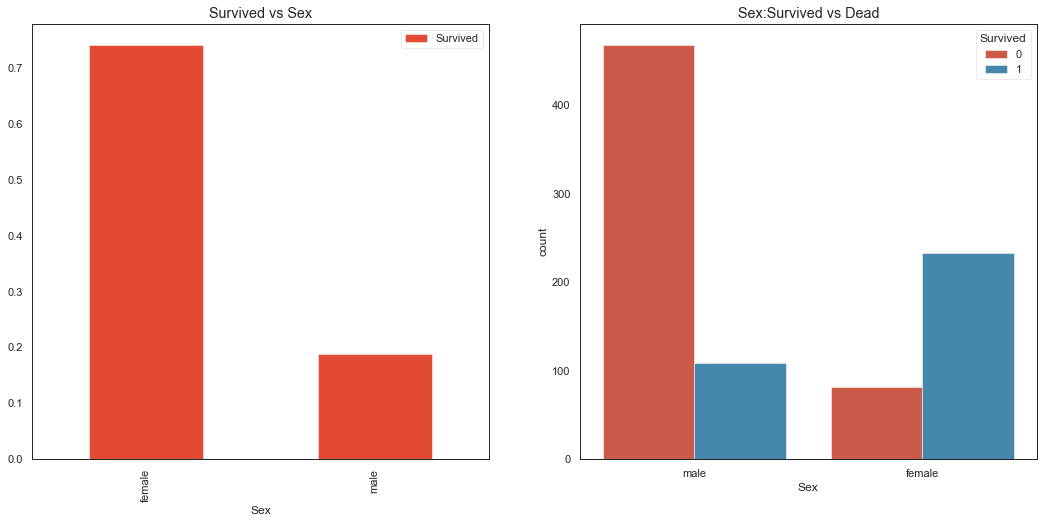

In [7]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

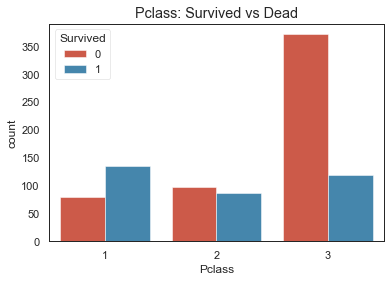

In [8]:
sns.countplot('Pclass', hue='Survived', data=df_train)
plt.title('Pclass: Survived vs Dead')
plt.show()


### Pie

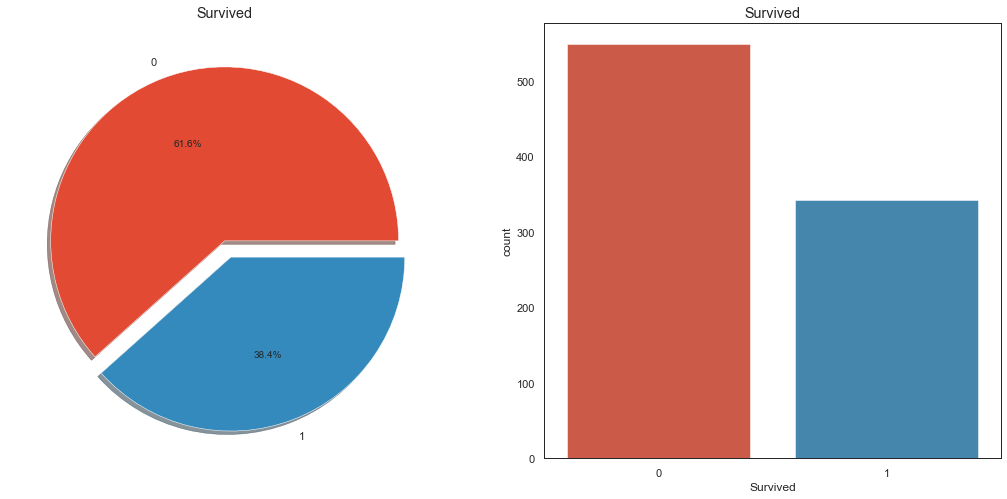

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df_train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

## Data Preprocessing
**Data preprocessing** là kĩ thuật chuẩn hóa, làm sạch dữ liệu trước khi đưa vào thuật toán.
Một vài bước tiêu biểu của Data preprocessing:
* Xử lý dữ liệu không cân bằng
* Xử lý dữ liệu bị thiếu
* Xử lý nhiễu
* Chuẩn hóa dữ liệu
* Chọn lọc đặc trưng
* ...

## Types of features
Features:
* số 
* theo từng mục (category)
* ngày tháng (datetime)

### Hãy xác định dạng đặc trưng trong tập dữ liệu:
<img src="http://s9.picofile.com/file/8339959442/titanic.png" height="700" width="600" />

## Data exploration

In [10]:
# shape
print(df_train.shape)

(891, 12)


In [11]:
#columns*rows
df_train.size

10692

>  <font color="red"><b>Note:</b></font>
how many NA elements in every column


In [12]:
df_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Xóa những dòng có giá trị NA

In [14]:
# remove rows that have NA's
df_train = df_train.dropna()

Xem số hàng, cột của tập dữ liệu bằng shape

In [15]:
# import train and test to play with it
df_train = pd.read_csv('raw/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
print(df_train.shape)

(891, 12)


Kiểm tra thông tin bằng info()

In [17]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Lọc ra những giá trị có thể xuất hiện trong từng cột

In [18]:
df_train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

Đếm số dòng của từng loại vé

In [19]:
df_train["Pclass"]

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [20]:
df_train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Cách preview những dòng đầu tiên hoặc cuối cùng của tập dữ liệu

In [21]:
df_train.head(5) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df_train.tail() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Cách xem ngẫu nhiên một vài dòng trong tập dữ liệu

In [23]:
df_train.sample(5) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
457,458,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S
771,772,0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,NaN,S
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
791,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S


Xem qua thống kê sơ bộ của các cột bằng describe()

In [24]:
df_train.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In ra tên của những hàng trong tập dữ liệu

In [25]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Ta có thể dùng where để query dữ liệu

In [26]:
df_train.where(df_train['Age']==30).head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_train[df_train['Age']==30]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.4750,NaN,S
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S
178,179,0,2,"Hale, Mr. Reginald",male,30.0,0,0,250653,13.0000,NaN,S
213,214,0,2,"Givard, Mr. Hans Kristensen",male,30.0,0,0,250646,13.0000,NaN,S
219,220,0,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.5000,NaN,S
244,245,0,3,"Attalah, Mr. Sleiman",male,30.0,0,0,2694,7.2250,NaN,C
253,254,0,3,"Lobb, Mr. William Arthur",male,30.0,1,0,A/5. 3336,16.1000,NaN,S
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C


In [28]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [45]:
df_train = df_train[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']]
df_train.head(5)

KeyError: "['Name', 'Embarked', 'Ticket'] not in index"

Tách X, y để huấn luyện

In [30]:
X = df_train.iloc[:, :-1].values
y = df_train.iloc[:, -1].values 

In [31]:
X[0]

array([1, 3, 'Braund, Mr. Owen Harris', 'male', 22.0, 1, 0, 'A/5 21171',
       7.25, nan, 'S'], dtype=object)

=============================================

In [32]:
x_all = df_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = df_train['Survived']

In [33]:
num_test = 0.3
X_train, X_test, y_train, y_test = train_test_split(x_all, y_all, test_size=num_test, random_state=100)

In [34]:
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
69,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,NaN,S
85,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S
794,3,"Dantcheff, Mr. Ristiu",male,25.0,0,0,349203,7.8958,NaN,S
161,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.7500,NaN,S
815,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S


In [35]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_score = accuracy_score(y_test, logreg_prediction)
print(logreg_score)

ValueError: could not convert string to float: 'S'

## Feature transformations
Chúng ta sẽ chuyển đổi dữ liệu sang một dạng mới với kì vọng sẽ đem lại giá trị tốt hơn cho việc phân tích, đưa ra quyết định
Ở đây chúng ta sẽ biến đổi:
1. Age
1. Cabin
1. Fare
1. Name

In [44]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    
    
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

df_train = transform_features(df_train)
df_train.head() 

ValueError: fill value must be in categories

## Feature Encoding

Một số cách mã hóa đặc trưng:
- One hot encoding
- TFIDF

In [42]:
def encode_features(df_train):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = df_train[features]
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
    return df_train

## Prepare Features & Targets

* X ==>> Feature
* y ==>> Target

In [43]:
#Encode Dataset
df_train = encode_features(df_train)
df_train.head()

TypeError: argument must be a string or number

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#We need to reshape our data since the Scaler takes in arrays
ages_train = np.array(df_train["Age"]).reshape(-1, 1)
fares_train = np.array(df_train["Fare"]).reshape(-1, 1)

df_train["Age"] = scaler.fit_transform(ages_train)
df_train["Fare"] = scaler.fit_transform(fares_train)

Chuẩn bị X(features) , y(target)

In [38]:
x_all = df_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = df_train['Survived']

In [39]:
num_test = 0.3
X_train, X_test, y_train, y_test = train_test_split(x_all, y_all, test_size=num_test, random_state=100)

<a id="76"></a> <br>
## Logistic Regression

In [40]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

ValueError: could not convert string to float: 'S'

In [44]:
logreg_prediction = logreg.predict(X_test) #=> y_pred
logreg_score = accuracy_score(y_test, logreg_prediction)
print(logreg_score)

0.7835820895522388


In [45]:
logreg_clf = LogisticRegression()

parameters_logreg = {"fit_intercept": [True, False],
                     "max_iter": [10, 50, 100, 200, 500, 1000], 
                     "warm_start": [True, False]}

grid_logreg = GridSearchCV(logreg_clf, parameters_logreg, scoring=make_scorer(accuracy_score))
grid_logreg.fit(X_train, y_train)

logreg_clf = grid_logreg.best_estimator_

logreg_clf.fit(X_train, y_train)

logreg_prediction = logreg_clf.predict(X_test)
logreg_score = accuracy_score(y_test, logreg_prediction)
print(logreg_score)

C:\Users\xuankhang.do.SHOPEEVN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\xuankhang.do.SHOPEEVN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver opt

0.7947761194029851


C:\Users\xuankhang.do.SHOPEEVN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [46]:
X_train.shape

(623, 9)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten , Dense, Activation, Dropout

# def f1...
def create_model(dropout_rate=0.0, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(256, input_shape=(9, )))
    model.add(Activation(activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(128))
    model.add(Activation(activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64))
    model.add(Activation(activation))
    model.add(Dropout(dropout_rate))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(
        loss='binary_crossentropy',  # we train 10-way classification
        optimizer=optimizer, 
        metrics=['accuracy']  # report accuracy during training
    )
    return model

ModuleNotFoundError: No module named 'tensorflow'

In [52]:
model = create_model()
model.summary()

NameError: name 'create_model' is not defined

In [53]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(
    build_fn=create_model,
    epochs=100, batch_size=10, verbose=1)


# define the grid search parameters
# batch_size = [16, 32, 64, 128]
# epochs = [50, 100, 200]
# dropout_rate = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
# activation = ['relu', 'tanh', 'sigmoid']
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
batch_size = [32, 64]
epochs = [10, 20]
# dropout_rate = [0.05, 0.1]
activation = ['relu', 'sigmoid']
# optimizer = ['SGD', 'Adam', 'Nadam']
param_grid = dict(batch_size=batch_size, 
                  epochs=epochs, 
                  # dropout_rate=dropout_rate,
                  activation=activation,
                  # optimizer=optimizer
                  )

# search the grid
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    verbose=1,
                    cv=5,
                    )

grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
grid_best = grid.best_estimator_

history = grid_best.fit(X_train, y_train)

logreg_prediction = grid_best.predict(X_test)
logreg_score = accuracy_score(y_test, logreg_prediction)
print(logreg_score)

In [ ]:
acc = history.history['acc']
# val_acc = history.history['val_acc']

loss = history.history['loss']
# val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()